# Bank Customer Churn 

![churn](Customer-churn-rate-1024x683.jpg)

## Introduction
This notebook presents an analysis of customer churn at a bank. The dataset used in this analysis contains information about customer demographics, account information, and usage patterns, among other variables. The goal of this analysis is to identify factors that are associated with customer churn and to develop a predictive model that can be used to identify customers who are at risk of churning.

The notebook is organized as follows. First, we will explore the dataset and perform some basic data cleaning and preprocessing steps. Next, we will conduct an exploratory data analysis to gain insights into the relationships between the variables in the dataset and to identify potential factors that are associated with churn. We will then develop several machine learning models to predict churn and evaluate their performance using various metrics. Finally, we will discuss the results of our analysis and provide recommendations for the bank company to reduce customer churn and improve customer retention.

## Data Collection and Preprocessing

In this section, we will explore the process of data collection and preprocessing for the bank customer churn analysis. The dataset used in this analysis was obtained from [Kaggle](https://www.kaggle.com/code/raphaelmarconato/customer-churn-eda-balancing-and-ml-83-63). The dataset contains information about customer demographics, account details, usage patterns, and churn status. 

Data collection is a critical step in any analysis, as the quality and relevance of the data directly impact the insights and conclusions drawn from the analysis. We will discuss the steps taken to collect and prepare the data for analysis, ensuring its suitability for the churn prediction task.

Let's dive into the details of the data cleaning and preprocessing steps performed on the bank customer churn dataset obtained from Kaggle.

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Utility functions
from scipy.stats import randint as sp_randint
import pickle

# Visualization tools
from yellowbrick.classifier import ConfusionMatrix

# Set default visualization style
sns.set()

# Ignore warnings
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data = pd.read_csv('Customer-Churn-Records.csv')

#### Here are the categorical and continuous variables.

- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

## Exploratory Data Analysis

In this section, we will conduct an exploratory data analysis (EDA) to gain insights into the bank customer churn dataset. EDA is a crucial step in the data analysis process that allows us to understand the underlying patterns, relationships, and distributions within the dataset.

Through various visualizations and statistical measures, we will delve into the dataset's variables, their distributions, and the relationships between them.

The EDA process will provide us with a deeper understanding of the dataset, allowing us to identify potential factors associated with customer churn. We will examine demographic information, account details, usage patterns, and other variables to uncover trends and patterns that may influence customer churn.

By gaining insights from our EDA, we can make informed decisions and develop effective strategies to reduce customer churn and improve customer retention. So, let's embark on our exploratory data analysis journey and uncover the valuable insights hidden within the bank customer churn dataset.

In [4]:
# view first 5 rows of dataset
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [5]:
# check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
# show descriptive statistics
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

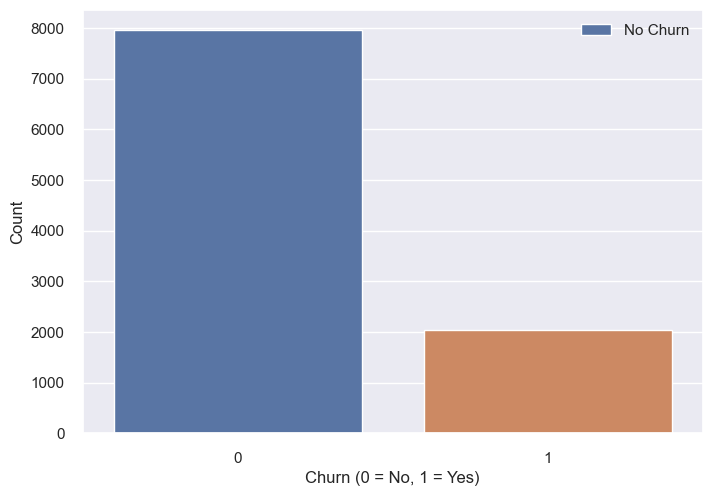

In [7]:
# check for class imbalance
sns.countplot(x='Exited', data=data)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

In [8]:
# how many churners and non-churners are there?
data['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

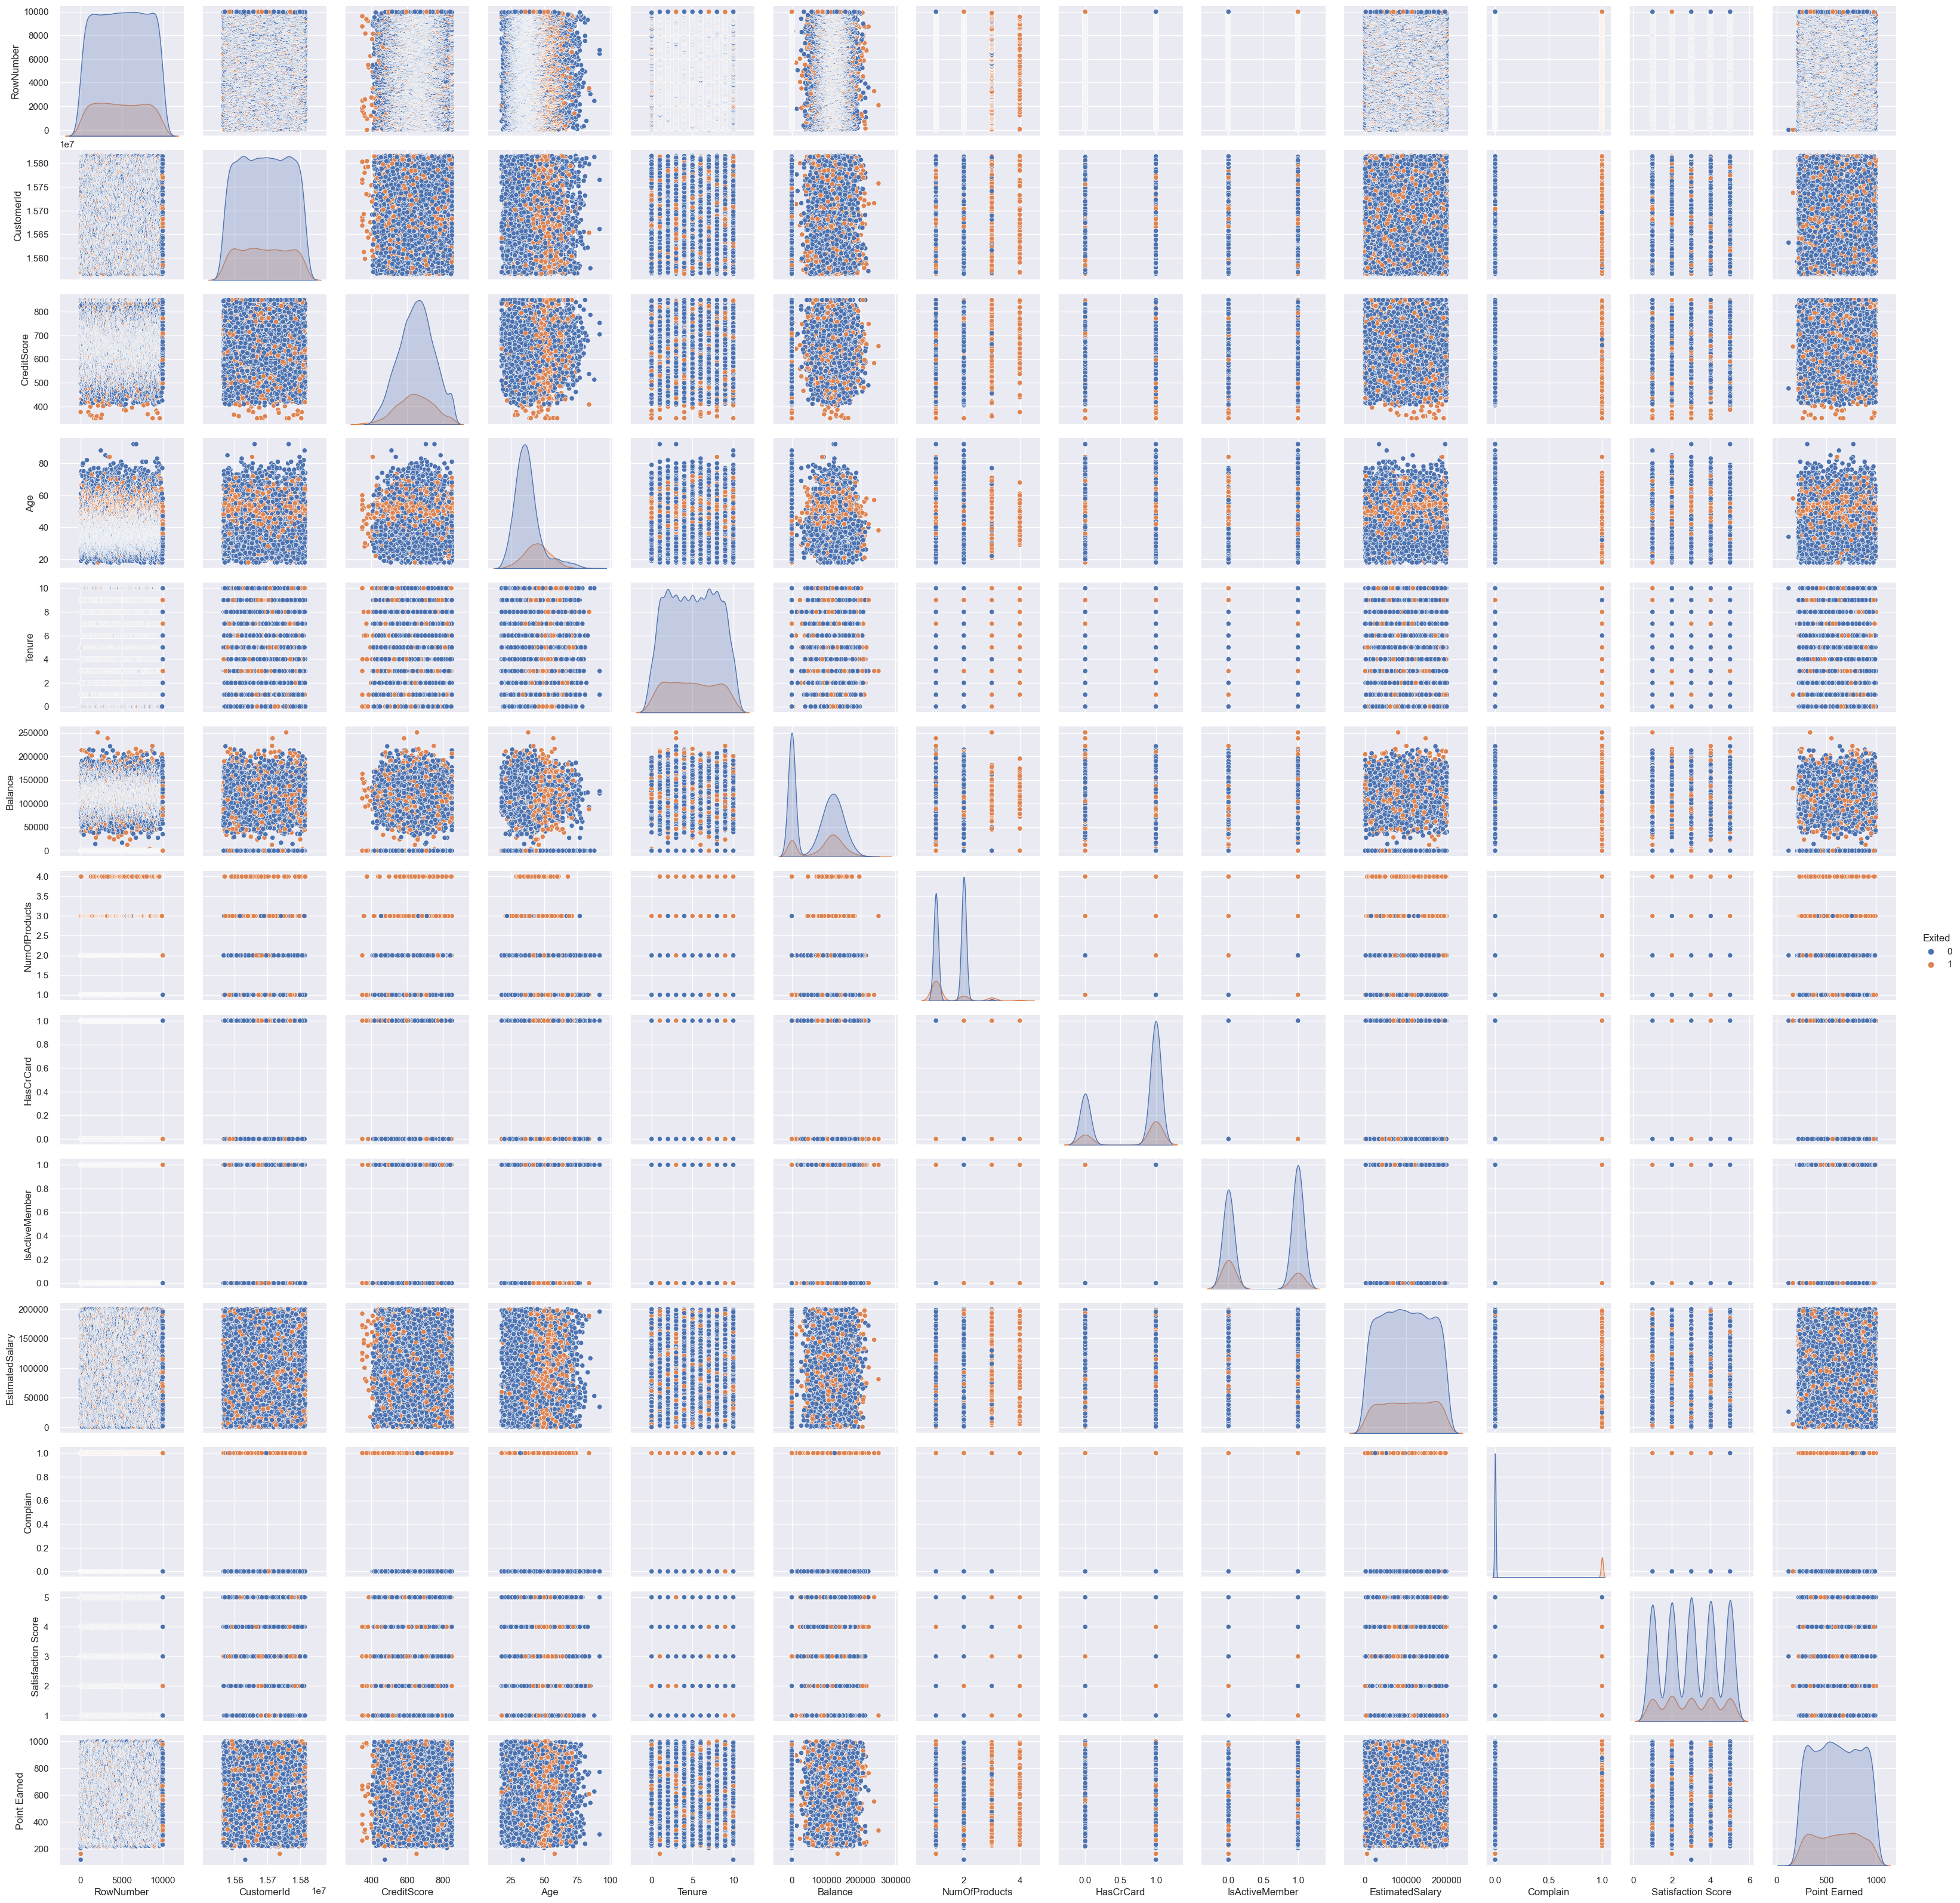

In [9]:
# visualize the relationship between numerical variables and churn
sns.pairplot(data=data, hue='Exited')
plt.show()

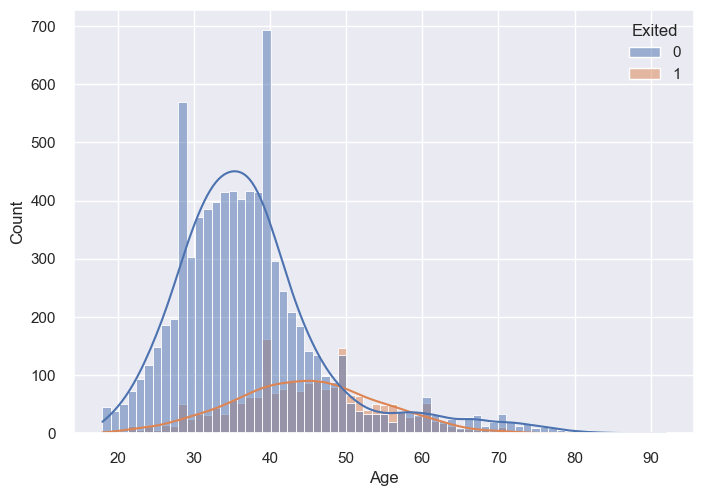

In [10]:
# visualize the distribution of Age and Churn
sns.histplot(data=data, x='Age', hue='Exited', kde=True)
plt.show()

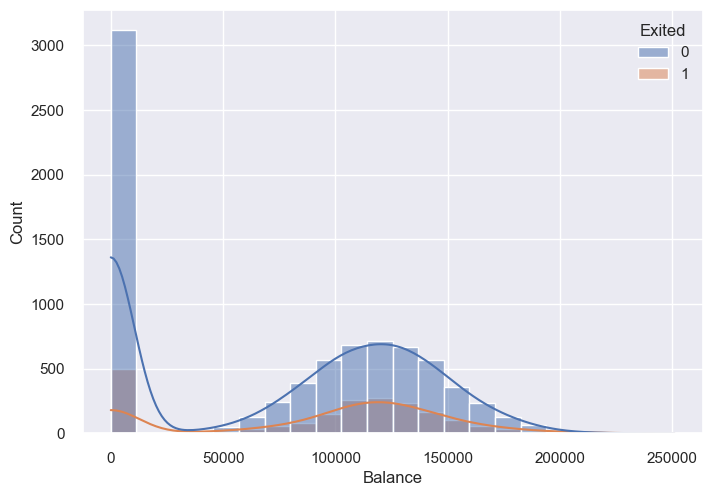

In [11]:
# visualize the distribution of Balance and Churn
sns.histplot(data=data, x='Balance', hue='Exited', kde=True)
plt.show()

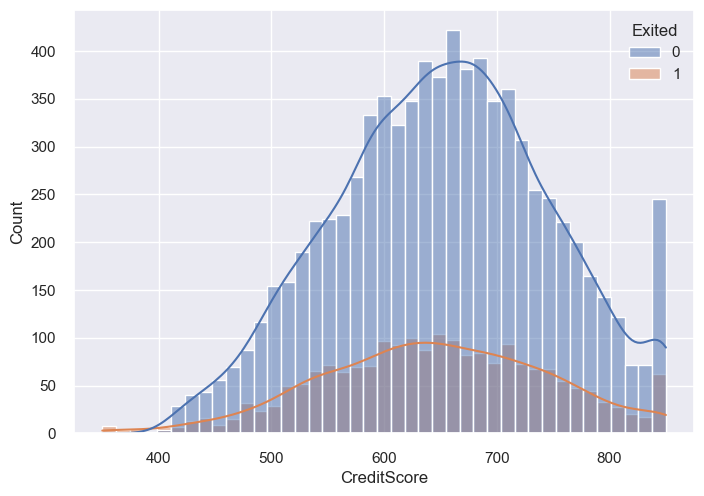

In [12]:
# visualize the distribution of Credit Score and Churn
sns.histplot(data=data, x='CreditScore', hue='Exited', kde=True)
plt.show()

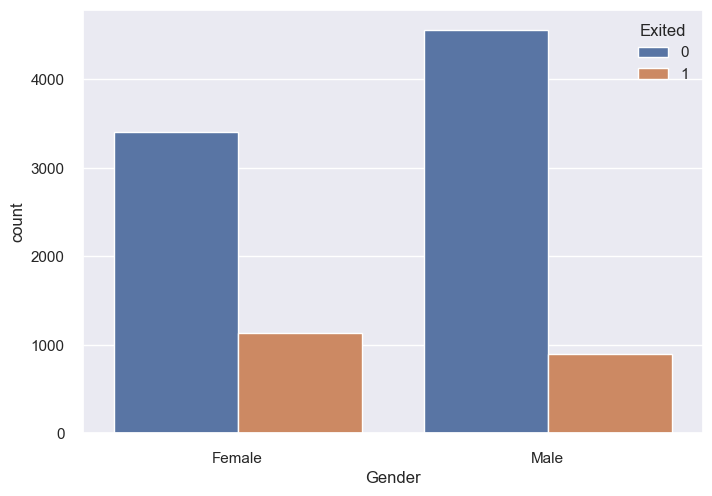

In [13]:
# compare churn and non-churners by Gender
sns.countplot(x='Gender', hue='Exited', data=data)
plt.show()

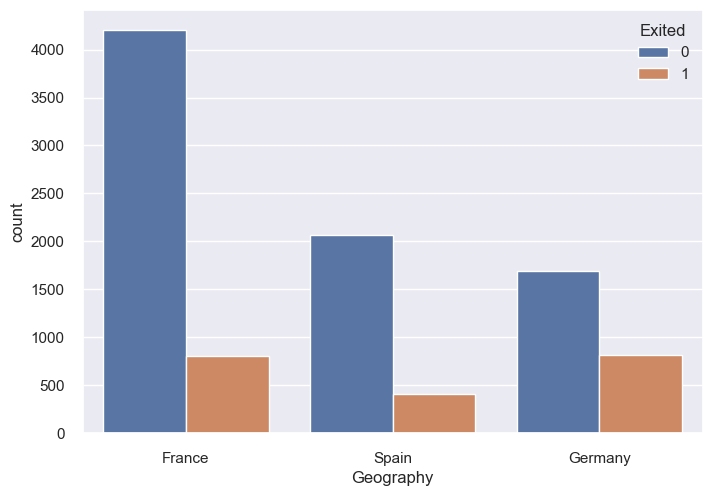

In [16]:
# compare churn and non-churners by Geography
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()

In [15]:
# how many exited customers do we have from each country and gender?
data.groupby(['Geography', 'Gender'])['Exited'].count()

Geography  Gender
France     Female    2261
           Male      2753
Germany    Female    1193
           Male      1316
Spain      Female    1089
           Male      1388
Name: Exited, dtype: int64

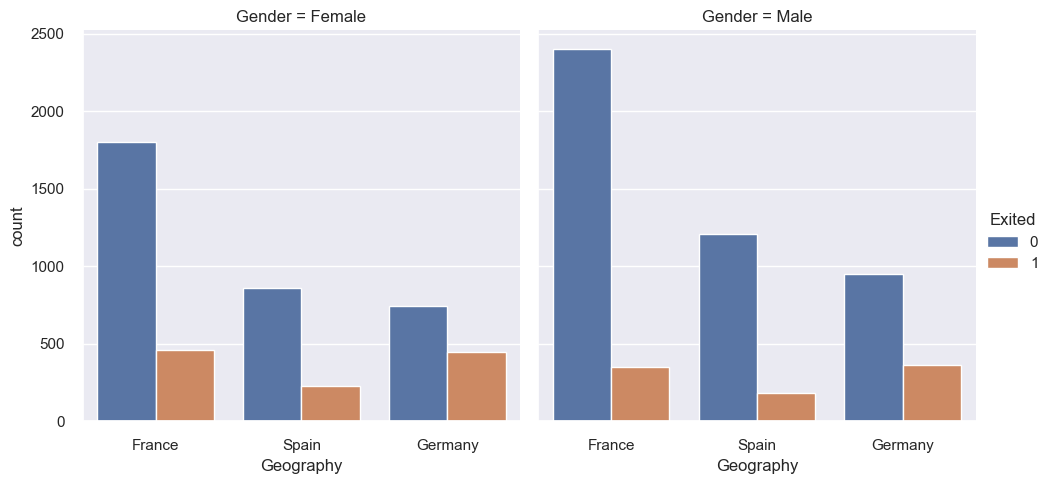

In [14]:
# visualize the count of individuals who exited the company by geography and gender using a categorical plot
sns.catplot(x='Geography', col='Gender', hue='Exited', kind='count', data=data)
plt.show()

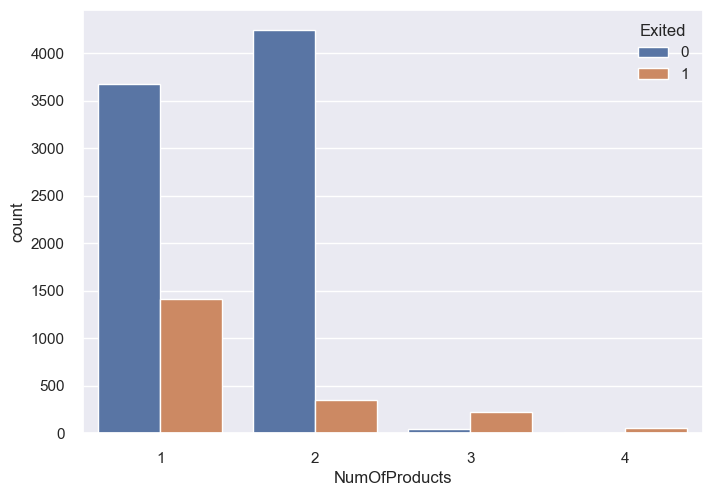

In [68]:
# visualize the relationship between NumOfProducts and Churn
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.show()

## Model Building and Evaluation

In this section, we will focus on the crucial aspect of model building for predicting bank customer churn.  We will explore the process of feature engineering, model selection, and evaluation to construct robust predictive models for bank customer churn.

Feature engineering plays a vital role in enhancing the predictive power of our models. By transforming and creating new features from the existing dataset, we can capture more relevant information and improve the model's ability to discriminate between churners and non-churners. We will explore different techniques such as one-hot encoding for categorical variables and scaling for numerical variables.

After feature engineering, we will proceed to build and evaluate different machine learning models. We will utilize a range of algorithms, including Logistic Regression, Gaussian Naive Bayes, Decision Tree, Random Forest, and AdaBoost. These models offer different strengths and are commonly used for classification tasks, such as churn prediction.

Evaluation metrics such as accuracy, precision, recall, and F1-score will be used to assess the performance of each model. Additionally, visualizations such as confusion matrices and classification reports will provide a comprehensive understanding of the model's predictive capabilities.

By leveraging feature engineering and employing multiple machine learning algorithms, we aim to develop accurate and reliable models for predicting customer churn. These models will help us identify customers at risk of churn and enable us to take proactive measures to retain them.

Let's delve into the process of feature engineering, model selection, and evaluation to construct robust predictive models for bank customer churn.

### Feature Engineering

In [17]:
# convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

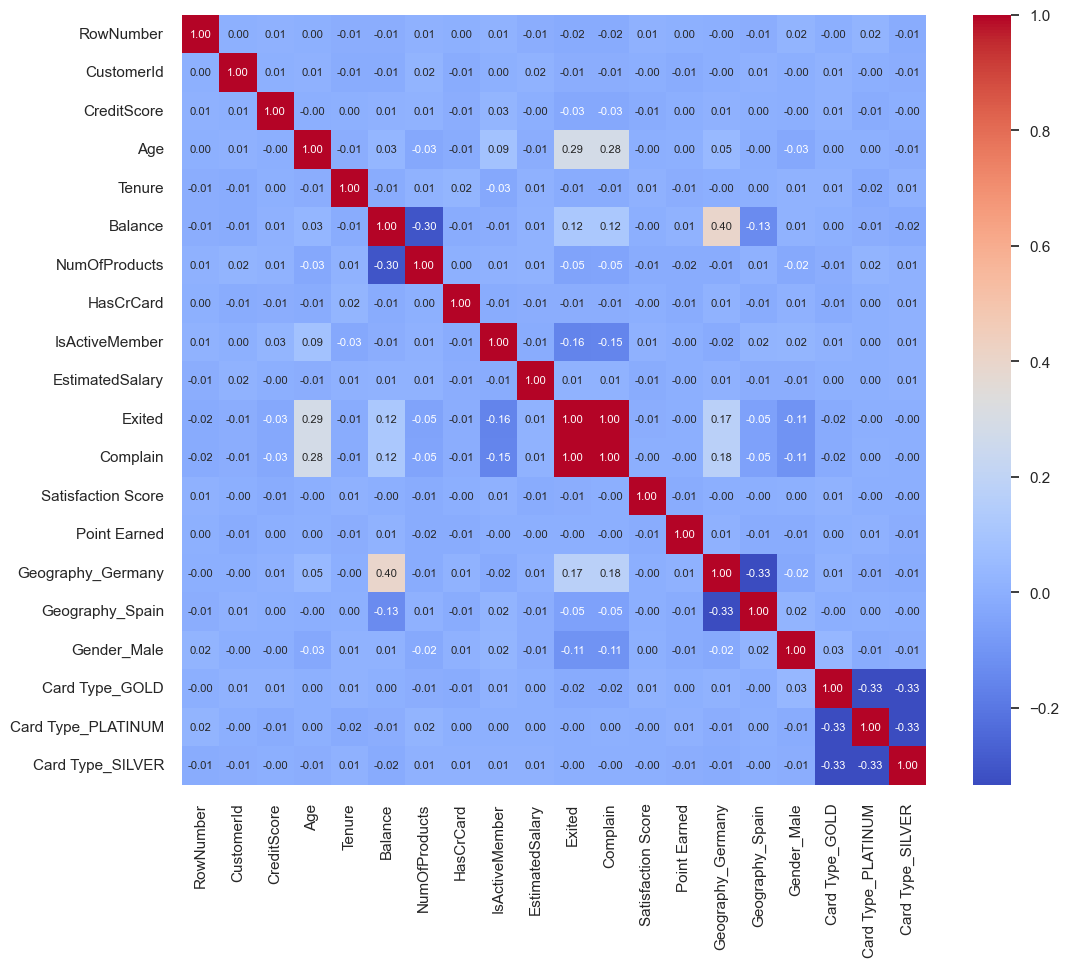

In [18]:
# visualize the correlation between variables
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'fontsize':8})
plt.show()

In [19]:
# drop highly correlated variables
data = data.drop('Complain', axis=1)

In [20]:
# drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [21]:
# split data into features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [22]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# scale numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Balance the training data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

### Logistic Regression
The accuracy score of the logistic regression model is 0.705, indicating that the model correctly predicted the class label for 70.5% of the test instances.

The confusion matrix shows that the model correctly predicted 1700 true negatives and 414 true positives, but made 716 false negatives and 170 false positives.

The classification report shows that the model has a higher precision for the negative class (0.91) than the positive class (0.37), but a higher recall for the positive class (0.71) than the negative class (0.70). The F1-score is higher for the negative class (0.79) than the positive class (0.48), indicating that the model performs better at predicting the negative class.

Overall, these results suggest that the logistic regression model has moderate performance in predicting the target variable.

In [25]:
# create a logistic regression model
logistic = LogisticRegression(random_state = 1, max_iter=1000)

In [26]:
# fit the model on the training data
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [27]:
# make predictions on the test data
y_pred = logistic.predict(X_test)

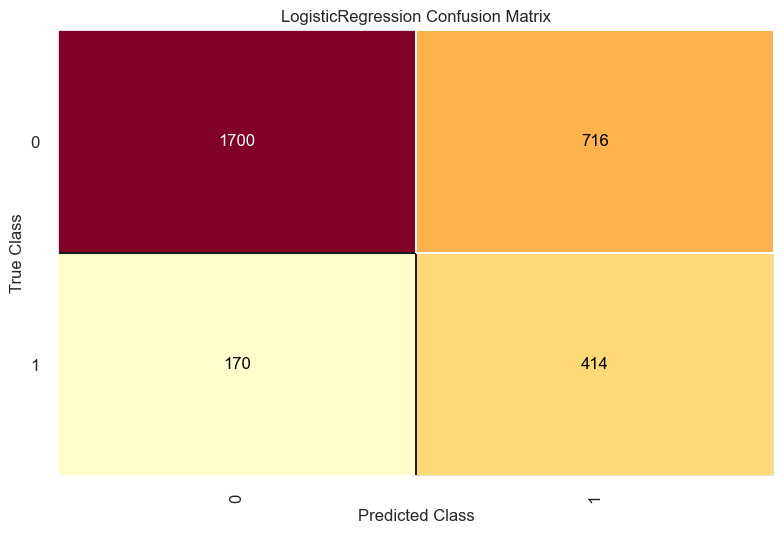

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
# generate confusion matrix
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [29]:
# score the model
logistic_accuracy = accuracy_score(y_test, y_pred)
print(logistic_accuracy)

0.7046666666666667


In [30]:
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2416
           1       0.37      0.71      0.48       584

    accuracy                           0.70      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.70      0.73      3000



In [31]:
# save the model for future use
pickle.dump(logistic, open('logistic_model.pkl', 'wb'))

### Gaussian Naive Bayes 
The Gaussian Naive Bayes model has an accuracy score of 0.721, indicating that the model correctly predicted the class label for 72.1% of the test instances.

The confusion matrix shows that the model correctly predicted 403 true negatives and 1760 true positives, but made 656 false positives and 181 false negatives.

The classification report shows that the model has a higher precision for the negative class (0.91) than the positive class (0.38), but a higher recall for the negative class (0.69) than the positive class (0.73). The F1-score is higher for the negative class (0.81) than the positive class (0.49), indicating that the model performs better at predicting the negative class.

Overall, these results suggest that the Gaussian Naive Bayes model has moderate performance in predicting the target variable, however, the confusion matrix shows that the model has a relatively high number of false positives, which is concerning.

In [32]:
# create a Gaussian Naive Bayes model
naive_bayes = GaussianNB()

In [33]:
# fit the model on the training data
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [34]:
# make predictions on the test data
y_pred = naive_bayes.predict(X_test)

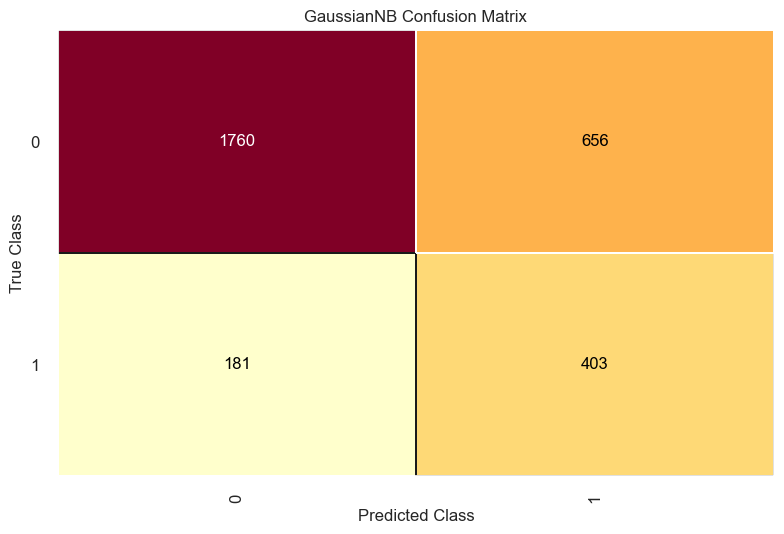

<AxesSubplot: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
# generate confusion matrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [36]:
# score the model
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print(naive_bayes_accuracy)

0.721


In [37]:
# generate classification report
classification_decision = (classification_report(y_test, y_pred))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2416
           1       0.38      0.69      0.49       584

    accuracy                           0.72      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.80      0.72      0.75      3000



In [38]:
# save the model for future use
pickle.dump(naive_bayes, open('naive_bayes_model.pkl', 'wb'))

### Decision Tree
This decision tree model has an accuracy score of 0.768, indicating that the model correctly predicted the class label for 76.8% of the test instances.

The confusion matrix shows that the model correctly predicted 393 true negatives and 1910 true positives, but made 506 false positives and 191 false negatives.

The classification report shows that the model has a higher precision for the negative class (0.91) than the positive class (0.44), and a higher recall for the negative class (0.79) than the positive class (0.67). The F1-score is higher for the negative class (0.85) than the positive class (0.53), indicating that the model performs better at predicting the negative class.

In addition, the code checks the feature importance of the decision tree model using `feature_importances_` attribute of the trained model. The results show that the most important features are `Age`, `Balance`, `NumOfProducts`, and `EstimatedSalary`.

Overall, these results suggest that the decision tree model has moderate performance in predicting the target variable.

In [39]:
# create a decision tree model
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)

In [40]:
# fit the model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)

In [41]:
# make predictions on the test data
y_pred = decision_tree.predict(X_test)

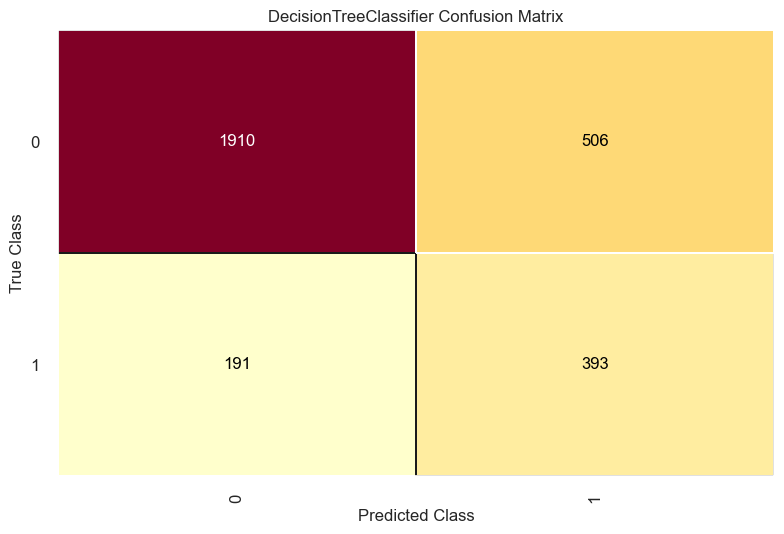

<AxesSubplot: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
# generate confusion matrix
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [43]:
# score the model
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(decision_tree_accuracy)

0.7676666666666667


In [44]:
# generate classification report
classification_decision = (classification_report(y_test, y_pred))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2416
           1       0.44      0.67      0.53       584

    accuracy                           0.77      3000
   macro avg       0.67      0.73      0.69      3000
weighted avg       0.82      0.77      0.78      3000



<AxesSubplot: ylabel='Feature'>

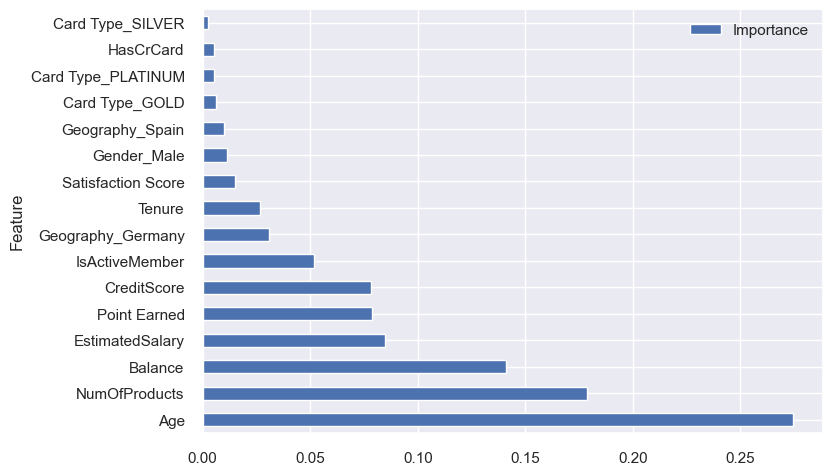

In [45]:
# Check feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.plot(kind='barh', x='Feature', y='Importance')

In [46]:
# save the model
pickle.dump(decision_tree, open('decision_tree_model.pkl', 'wb'))

### Random Forest
This random forest model has an accuracy score of 0.839, indicating that the model correctly predicted the class label for 83.9% of the test instances.

The confusion matrix shows that the model correctly predicted 388 true negatives and 2130 true positives, but made 286 false positives and 196 false negatives.

The classification report shows that the model has a higher precision for the negative class (0.92) than the positive class (0.58), but a higher recall for the positive class (0.66) than the negative class (0.88). The F1-score is higher for the negative class (0.90) than the positive class (0.62), indicating that the model performs better at predicting the negative class.

In addition, the feature importance shows that the most important features in predicting the target variable are `Age`, `NumOfProducts`, `Balance`, and `EstimatedSalary`. 

Overall, these results suggest that the random forest model has good performance in predicting the target variable and outperforms the previous models discussed. The model has an accuracy of 0.84 and has a good balance between precision and recall for both classes.

In [47]:
# create a random forest model
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)

In [48]:
# fit the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=7,
                       random_state=0)

In [49]:
# make predictions on the test data
y_pred = random_forest.predict(X_test)

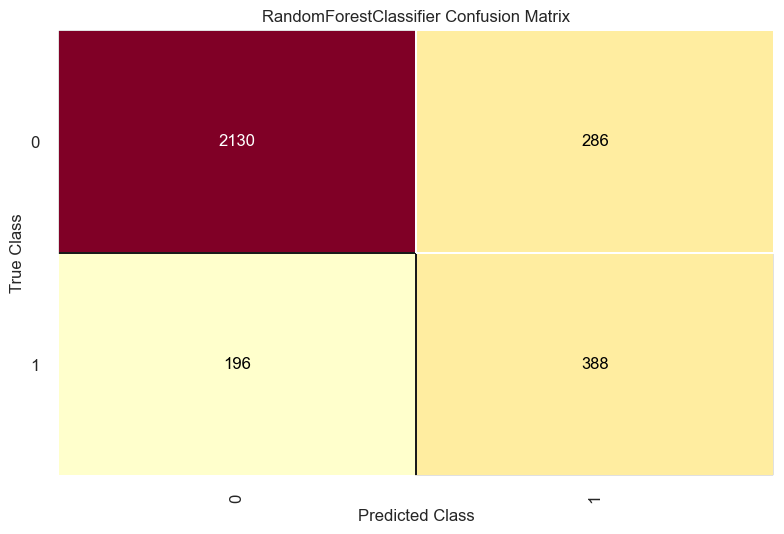

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [50]:
# generate confusion matrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [51]:
# score the model
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(random_forest_accuracy)

0.8393333333333334


In [52]:
# generate classification report
classification_random = (classification_report(y_test, y_pred))
print(classification_random)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2416
           1       0.58      0.66      0.62       584

    accuracy                           0.84      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.85      0.84      0.84      3000



<AxesSubplot: ylabel='Feature'>

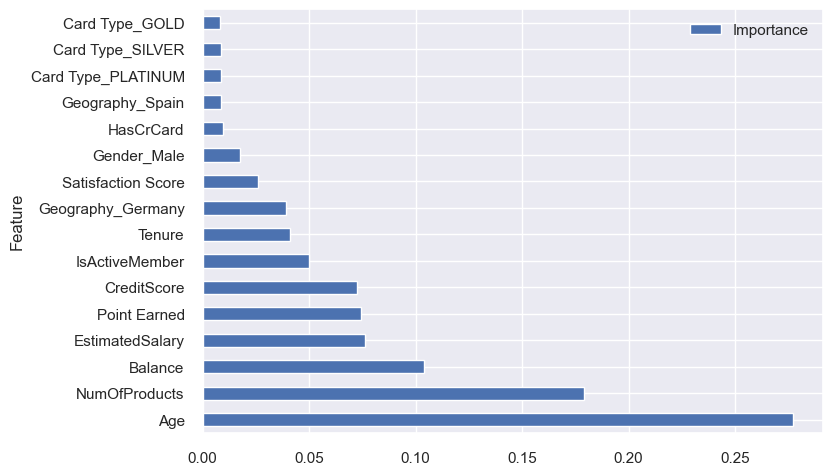

In [53]:
# print feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.plot(kind='barh', x='Feature', y='Importance')

In [54]:
# save the model for future use
pickle.dump(random_forest, open('model.pkl', 'wb'))

### AdaBoost
The AdaBoost model uses `RandomizedSearchCV` to find the best parameters for the model using a randomized search over a grid of hyperparameters. The best set of hyperparameters is then used to train the AdaBoost model.

The confusion matrix shows that the model correctly predicted 426 true negatives and 1952 true positives, but made 464 false positives and 158 false negatives.

The accuracy score of the model is 0.79, which is lower than the random forest model.

The classification report shows that the model has a higher precision for the negative class (0.93) than the positive class (0.48), but a higher recall for the positive class (0.73) than the negative class (0.81). The F1-score is higher for the negative class (0.86) than the positive class (0.58), indicating that the model performs better at predicting the negative class.

Overall, these results suggest that the AdaBoost model has moderate performance in predicting the target variable. However, the model does have the highest churn precision score of all the models discussed. Since the goal of our model is to predict customer churn, the AdaBoost model may be the best model for this task. In churn prediction, the cost of false negatives (customers who are at risk of churning but are not identified as such) is often higher than the cost of false positives (customers who are not at risk of churning but are identified as such). False negatives represent missed opportunities to retain customers who are at risk of leaving, while false positives may result in unnecessary retention efforts for customers who are not at risk of leaving.

Therefore, in churn prediction, it is important to optimize for precision, which can help the bank allocate their resources more effectively to retain customers.

In [55]:
# import adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [56]:
# find the best parameters for the model
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
                'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}


In [57]:
# create an AdaBoost model
model = AdaBoostClassifier(random_state=0)
grid_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs = -1)
grid_result = grid_search.fit(X_train, y_train)

In [58]:
# print the best parameters
print('Learning Rate: ', grid_result.best_params_['learning_rate'])
print('Best Score: ', grid_result.best_score_)

Learning Rate:  1.0
Best Score:  0.7780385075040505


In [59]:
# run the model with the best parameters
ada_boost = AdaBoostClassifier(n_estimators=grid_result.best_params_['n_estimators'],
                                learning_rate=grid_result.best_params_['learning_rate'],
                                random_state=0)

In [60]:
# fit the model on the training data
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=400, random_state=0)

In [61]:
# make predictions on the test data
y_pred = ada_boost.predict(X_test)

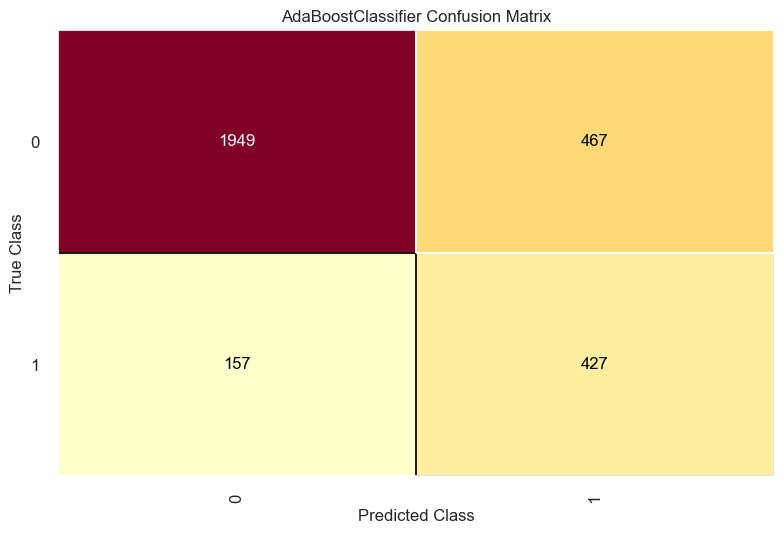

<AxesSubplot: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
# generate confusion matrix
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [63]:
# score the model
ada_boost_accuracy = accuracy_score(y_test, y_pred)
print(ada_boost_accuracy)

0.792


In [64]:
# generate classification report
classification_ada = (classification_report(y_test, y_pred))
print(classification_ada)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2416
           1       0.48      0.73      0.58       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.81      3000



In [65]:
# save the model for future use
pickle.dump(ada_boost, open('ada_boost_model.pkl', 'wb'))

In [66]:
# compare the models
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost'],
    'Score': [logistic_accuracy, naive_bayes_accuracy, decision_tree_accuracy, random_forest_accuracy, ada_boost_accuracy]})
models.sort_values(by='Score', ascending=False)

Model     Score
3        Random Forest  0.839333
4             AdaBoost  0.792000
2        Decision Tree  0.767667
1          Naive Bayes  0.721000
0  Logistic Regression  0.704667

## Conclusion and Recommendations

Based on the analysis of the five models - logistic regression, naive Bayes, decision tree, random forest, and AdaBoost - for predicting customer churn, we can draw the following conclusions:

Among the models considered, the random forest model demonstrated the highest accuracy, suggesting that it is the most effective in predicting customer churn on this dataset. The random forest algorithm's ensemble approach, which combines multiple decision trees, enables it to capture complex patterns and interactions within the data, resulting in improved predictive performance.

On the other hand, when specifically focusing on identifying customers who are at risk of churning, the AdaBoost model outperformed the other models in terms of precision for the positive class. AdaBoost employs a boosting technique that assigns higher weights to misclassified instances, thereby emphasizing the importance of accurately predicting churners.

While the random forest model exhibits high accuracy, it is important to note that the goal of churn prediction is to identify customers who are likely to churn and prioritize retention efforts accordingly. In this context, the AdaBoost model's higher precision for the positive class is advantageous. By identifying a higher proportion of customers who are truly at risk of churning, the AdaBoost model can enable the bank to allocate resources effectively and implement targeted retention strategies.

Considering these factors, we recommend the AdaBoost model as the preferred choice for predicting customer churn. Its superior precision for churners aligns with the business objective of retaining at-risk customers. However, it is crucial to assess the trade-off between precision and other performance metrics based on the bank's specific goals and available resources.

By leveraging the insights gained from the analysis and selecting the appropriate model, the bank can proactively identify customers at risk of churn and take proactive measures to retain them. Continuous monitoring and evaluation of the model's performance will allow for iterative improvements in churn prediction and customer retention strategies.

In summary, the selected models provide valuable tools for predicting customer churn and offer opportunities for the bank to enhance customer retention efforts. The bank can leverage the random forest model's overall accuracy or prioritize precision for churners using the AdaBoost model, depending on its specific business objectives and resources.

## References

1. [Customer Churn - EDA, Balancing and ML (83.63%)](https://www.kaggle.com/code/raphaelmarconato/customer-churn-eda-balancing-and-ml-83-63)
2. [How to handle Imbalanced Data in machine learning classification](https://www.justintodata.com/imbalanced-data-machine-learning-classification/)